#  UEFA vs CONMEBOL — A Comparative Analysis of Their Official Football Competitions

**Introduction**

This project explores the historic and competitive balance between the two most successful football confederations: **UEFA** (Europe) and **CONMEBOL** (South America).
Using data from official international competitions—including World Cup qualifiers, continental tournaments, and World Cup matches—we aim to answer key questions:

- Which confederation dominates offensively?

- Where is the playing field more even?

- Does home advantage play a bigger role in South America or Europe?

The analysis is based on a curated dataset of official matches filtered by tournament, team affiliation, and match type. Visualization tools like Plotly and Pandas were used to uncover trends, patterns, and differences

In [1]:
#imports 

import pandas as pd
import numpy as np
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:

import plotly.io as pio

pio.renderers.default = "png"

**Dataset Preparation**

To ensure a fair and relevant comparison:

- We filtered matches to **official tournaments only** (no friendlies or minor competitions).

- Teams were identified by confederation using historical affiliation:

    - ***UEFA***: European nations like Germany, Italy, France, etc.

    - ***CONMEBOL***: South American nations like Brazil, Argentina, Uruguay, etc.

This setup allows for a clean head-to-head comparison, removing noise from unofficial or irrelevant matches.

In [3]:
#reading the dataset
results = pd.read_csv("results.csv")



In [4]:
#exploring
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
48330,2025-06-10,Serbia,Andorra,3,0,FIFA World Cup qualification,Leskovac,Serbia,False
48331,2025-06-10,Latvia,Albania,1,1,FIFA World Cup qualification,Riga,Latvia,False
48332,2025-06-10,New Zealand,Ukraine,1,2,Canadian Shield,Toronto,Canada,True
48333,2025-06-10,Canada,Ivory Coast,0,0,Canadian Shield,Toronto,Canada,False


In [5]:
# Competitions to compare

oficial_tournaments = [
    "FIFA World Cup",
    "FIFA World Cup qualification",
    "Intercontinental Cup",

    #UEFA 
    "UEFA Euro",
    "UEFA Euro qualification",
    "UEFA Nations League",
    
    #Conmebol 
    "Copa América",

]

for t in oficial_tournaments:
    var_name = t.lower().replace(" ", "_").replace(".","")
    exec(f"{var_name}_df = results.query('tournament == @t').copy()")
    

In [6]:
fifa_world_cup_qualification_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1770,1933-06-11,Sweden,Estonia,6,2,FIFA World Cup qualification,Stockholm,Sweden,False
1775,1933-06-29,Lithuania,Sweden,0,2,FIFA World Cup qualification,Kaunas,Lithuania,False
1794,1933-09-24,Yugoslavia,Switzerland,2,2,FIFA World Cup qualification,Belgrade,Yugoslavia,False
1802,1933-10-15,Poland,Czechoslovakia,1,2,FIFA World Cup qualification,Warsaw,Poland,False
1809,1933-10-29,Switzerland,Romania,2,2,FIFA World Cup qualification,Bern,Switzerland,False
...,...,...,...,...,...,...,...,...,...
48327,2025-06-10,Finland,Poland,2,1,FIFA World Cup qualification,Helsinki,Finland,False
48328,2025-06-10,San Marino,Austria,0,4,FIFA World Cup qualification,Serravalle,San Marino,False
48329,2025-06-10,Romania,Cyprus,2,0,FIFA World Cup qualification,Bucharest,Romania,False
48330,2025-06-10,Serbia,Andorra,3,0,FIFA World Cup qualification,Leskovac,Serbia,False


In [7]:
# fifa_world_cup_qualification_df we must filter in order to separe UEFA, CONMEBOL and non

df_uefa = pd.concat([uefa_euro_df, uefa_euro_qualification_df, uefa_nations_league_df]).sort_index()


In [8]:
uefa_teams = pd.unique(pd.concat([
    df_uefa['home_team'],
    df_uefa['away_team']
]))

conmebol_teams = pd.unique(pd.concat([
    copa_américa_df['home_team'],
    copa_américa_df['away_team']
]))

In [9]:
#as we know, the copa america invited some teams 
conmebol_teams

array(['Chile', 'Argentina', 'Brazil', 'Uruguay', 'Paraguay', 'Bolivia',
       'Peru', 'Ecuador', 'Colombia', 'Venezuela', 'United States',
       'Mexico', 'Honduras', 'Costa Rica', 'Haiti', 'Jamaica', 'Panama',
       'Japan', 'Qatar', 'Canada'], dtype=object)

In [10]:
conmebol_teams = conmebol_teams[:10]

In [11]:
uefa_WCQ = fifa_world_cup_qualification_df.query("home_team in @uefa_teams or away_team in @uefa_teams")
conmebol_WCQ = fifa_world_cup_qualification_df.query("home_team in @conmebol_teams or away_team in @conmebol_teams")

In [12]:
conmebol_WCQ

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3877,1954-02-14,Paraguay,Chile,4,0,FIFA World Cup qualification,Asunción,Paraguay,False
3878,1954-02-21,Chile,Paraguay,1,3,FIFA World Cup qualification,Santiago,Chile,False
3879,1954-02-28,Chile,Brazil,0,2,FIFA World Cup qualification,Santiago,Chile,False
3882,1954-03-07,Paraguay,Brazil,0,1,FIFA World Cup qualification,Asunción,Paraguay,False
3885,1954-03-14,Brazil,Chile,1,0,FIFA World Cup qualification,Rio de Janeiro,Brazil,False
...,...,...,...,...,...,...,...,...,...
48312,2025-06-10,Bolivia,Chile,2,0,FIFA World Cup qualification,El Alto,Bolivia,False
48313,2025-06-10,Uruguay,Venezuela,2,0,FIFA World Cup qualification,Montevideo,Uruguay,False
48314,2025-06-10,Peru,Ecuador,0,0,FIFA World Cup qualification,Lima,Peru,False
48315,2025-06-10,Argentina,Colombia,1,1,FIFA World Cup qualification,Buenos Aires,Argentina,False


**World Cup Qualifier Comparison**

We analyzed UEFA and CONMEBOL performance within their own qualifiers, not just head-to-head.
**Key Metrics**:

- Goals per match

- Average goal difference

- Top 10 teams by number of wins

- Home advantage (win percentage when playing at home)

**Visualizations**:

- Grouped bar charts were used to compare average performance across regions.

- Local dominance appears more pronounced in CONMEBOL due to travel difficulty and environmental diversity (altitude, climate, etc.).

*Insight*: While UEFA teams tend to score slightly more, CONMEBOL matches are more tightly contested and unpredictable.

In [13]:
#goals for matchs and goal difference 

uefa_WCQ['goal_diff'] = uefa_WCQ['home_score'] - uefa_WCQ['away_score']
conmebol_WCQ['goal_diff'] = conmebol_WCQ['home_score'] - conmebol_WCQ['away_score']

uefa_WCQ['total_goals'] = uefa_WCQ['home_score'] + uefa_WCQ['away_score']
conmebol_WCQ['total_goals'] = conmebol_WCQ['home_score'] + conmebol_WCQ['away_score']


gpp_uefa_WCQ = uefa_WCQ['total_goals'].mean()
gpp_conmebol_WCQ = conmebol_WCQ['total_goals'].mean()

uefa_diff = uefa_WCQ['goal_diff'].mean()
conmebol_diff = conmebol_WCQ['goal_diff'].mean()



/tmp/ipykernel_447387/318287510.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_447387/318287510.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_447387/318287510.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4

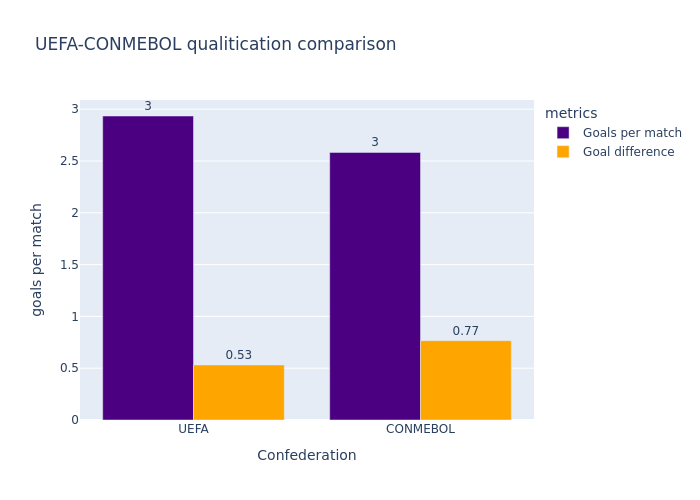

In [14]:
avg_goals_df = pd.DataFrame({
    'Confederation' : ['UEFA', 'CONMEBOL'],
    'Goals per match' : [
        gpp_uefa_WCQ,
        gpp_conmebol_WCQ
    ],
    'Goal diff' : [
        uefa_diff,
        conmebol_diff
    ]
    
})

fig = go.Figure()

fig.add_trace(go.Bar(
    x = avg_goals_df['Confederation'],
    y = avg_goals_df['Goals per match'],
    name ='Goals per match',
    marker_color = 'indigo',
    text = avg_goals_df['Goals per match'].round(),
    textposition = 'outside'
))

fig.add_trace(go.Bar(
    x = avg_goals_df['Confederation'],
    y = avg_goals_df['Goal diff'],
    name= 'Goal difference',
    marker_color = 'orange',
    text = avg_goals_df['Goal diff'].round(2),
    textposition='outside'
))


fig.update_layout(
    title ='UEFA-CONMEBOL qualitication comparison',
    barmode ='group',
    xaxis_title ='Confederation',
    yaxis_title = 'goals per match',
    legend_title ='metrics'
)

fig.show()

In [15]:
# count victories

def count_wins(df):
    victories = Counter()
    for _, row in df.iterrows():
        if row['home_score']>row['away_score']:
            victories[row['home_team']] += 1
        elif row['away_score'] > row['home_score']:
            victories[row['away_team']] += 1
    
    return pd.DataFrame.from_dict(victories, orient='index', columns=['victories']).sort_values('victories', ascending=False)

ranking_uefa = count_wins(uefa_WCQ)
ranking_conmebol = count_wins(conmebol_WCQ)


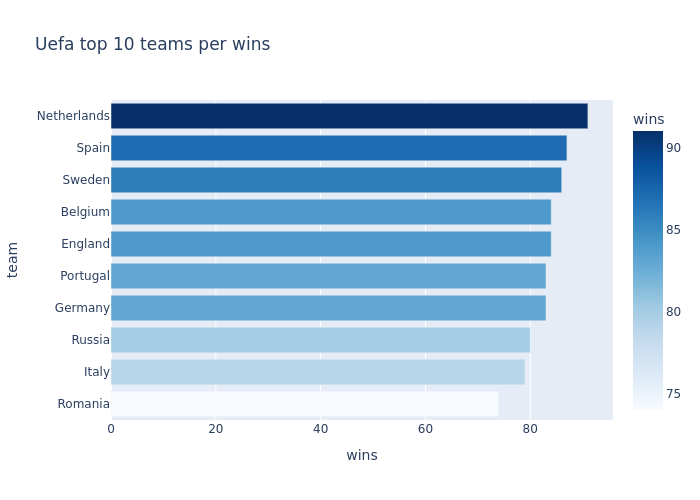

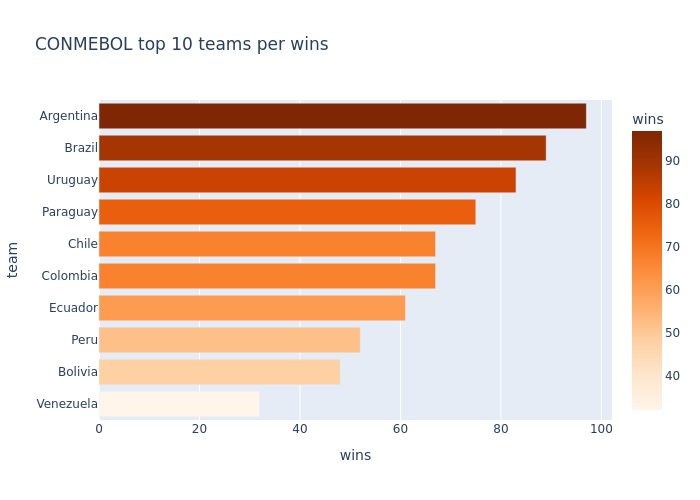

In [16]:
fig_uefa = px.bar(ranking_uefa.head(10).reset_index(),
                  x = 'victories', y ='index', orientation='h',
                   title= 'Uefa top 10 teams per wins',
                labels={'index' : 'team', 'victories': 'wins'},
                 color='victories', color_continuous_scale= 'Blues' )

fig_uefa.update_layout(yaxis = dict(autorange = "reversed"))
fig_uefa.show()

fig_conmebol = px.bar(ranking_conmebol.head(10).reset_index(),
                      x = 'victories', y = 'index', orientation= 'h',
                      title= 'CONMEBOL top 10 teams per wins',
                      labels={'index' : 'team', 'victories': 'wins'},
                      color = 'victories', color_continuous_scale='Oranges')

fig_conmebol.update_layout(yaxis =dict(autorange = 'reversed'))
fig_conmebol.show()

In [17]:
#local win and draw matchs

def local_wins(df):
    total_match = len(df)
    local_win = len(df[df['home_score'] > df['away_score']])
    return (local_win / total_match) * 100

def draw_matches(df):
    empates = df[df['home_score'] == df['away_score']]
    return len(empates) / len(df) * 100

local_advantage_WCQ_UEFA = local_wins(uefa_WCQ)
local_advantage_WCQ_CONM = local_wins(conmebol_WCQ)

draw_WCQ_UEFA = draw_matches(uefa_WCQ)
draw_WCQ_CONM = draw_matches(conmebol_WCQ)

away_wins_uefa = 100 - local_advantage_WCQ_UEFA - draw_WCQ_UEFA
away_wins_conm = 100 - local_advantage_WCQ_CONM - draw_WCQ_CONM


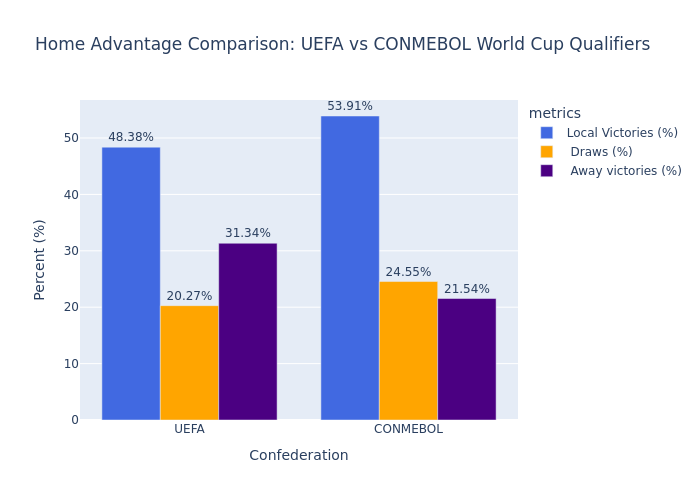

In [18]:
conferations = ['UEFA', 'CONMEBOL']

local_win_percentage = [local_advantage_WCQ_UEFA, local_advantage_WCQ_CONM]
draw_percent = [draw_WCQ_UEFA, draw_WCQ_CONM]
away_wins = [away_wins_uefa, away_wins_conm]

fig = go.Figure()

fig.add_trace(go.Bar(
    x = conferations,
    y = local_win_percentage,
    name = 'Local Victories (%)',
    marker_color = 'royalblue',
    text = [f"{val:.2f}%" for val in local_win_percentage],
    textposition= 'outside'
))

fig.add_trace(go.Bar(
    x = conferations,
    y = draw_percent,
    name = ' Draws (%)',
    marker_color = 'orange',
    text = [f"{val:.2f}%" for val in draw_percent],
    textposition= 'outside'
))

fig.add_trace(go.Bar(
    x = conferations,
    y = away_wins,
    name = ' Away victories (%)',
    marker_color = 'indigo',
    text = [f"{val:.2f}%" for val in away_wins],
    textposition= 'outside'
))


fig.update_layout(
    barmode = 'group',
    title = 'Home Advantage Comparison: UEFA vs CONMEBOL World Cup Qualifiers ',
    yaxis_title = 'Percent (%)',
    xaxis_title = 'Confederation',
    legend_title = 'metrics'
)

fig.show()


**Continental Tournament Comparison**

**Focus**:

**UEFA Euro** vs **Copa América**

- Analysis of **offensive output** and match outcomes

**Highlights**:

- South America has fewer teams but more frequent Copa América editions.

- UEFA Euro involves larger-scale tournaments with more defensive tactics.

**Graphs**:

- Interactive charts with scale buttons allowed for flexible comparison.

*Insight*: South American tournaments are more dynamic and goal-heavy, while UEFA matches are often more structured and tight.




In [19]:
#goals for matchs and #goal difference 

uefa_euro_df['goal_diff'] = uefa_euro_df['home_score'] - uefa_euro_df['away_score']
copa_américa_df['goal_diff'] = copa_américa_df['home_score'] - copa_américa_df['away_score']

uefa_euro_df['total_goals'] = uefa_euro_df['home_score'] + uefa_euro_df['away_score']
copa_américa_df['total_goals'] = copa_américa_df['home_score'] + copa_américa_df['away_score']


gpp_uefa_euro = uefa_euro_df['total_goals'].mean().round(2)
gpp_copa_america = copa_américa_df['total_goals'].mean().round(2)

uefa_diff_euro= uefa_euro_df['goal_diff'].mean().round(2)
copa_america_diff = copa_américa_df['goal_diff'].mean().round(2)

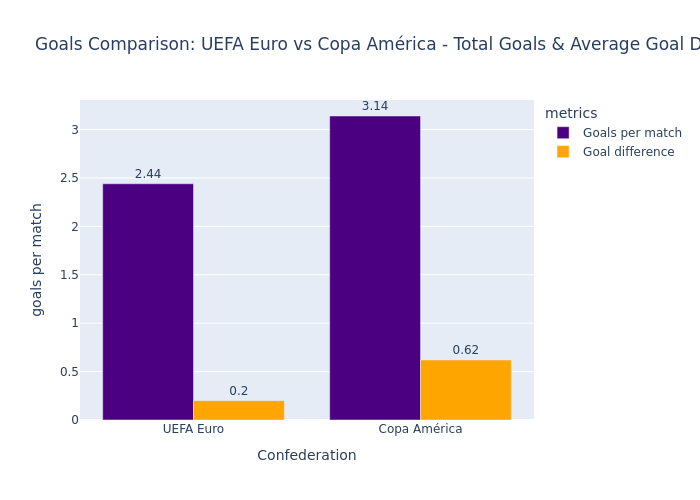

In [20]:
tournament = ["UEFA Euro", "Copa América"]

gpp = [gpp_uefa_euro, gpp_copa_america]
goal_diff = [uefa_diff_euro, copa_america_diff]
fig = go.Figure()

fig.add_trace(go.Bar(
    x = tournament,
    y = gpp,
    name ='Goals per match',
    marker_color = 'indigo',
    text = gpp,
    textposition = 'outside'
))

fig.add_trace(go.Bar(
    x = tournament,
    y = goal_diff,
    name= 'Goal difference',
    marker_color = 'orange',
    text = goal_diff,
    textposition='outside'
))


fig.update_layout(
    title ='Goals Comparison: UEFA Euro vs Copa América - Total Goals & Average Goal Difference',
    barmode ='group',
    xaxis_title ='Confederation',
    yaxis_title = 'goals per match',
    legend_title ='metrics'
)

fig.show()

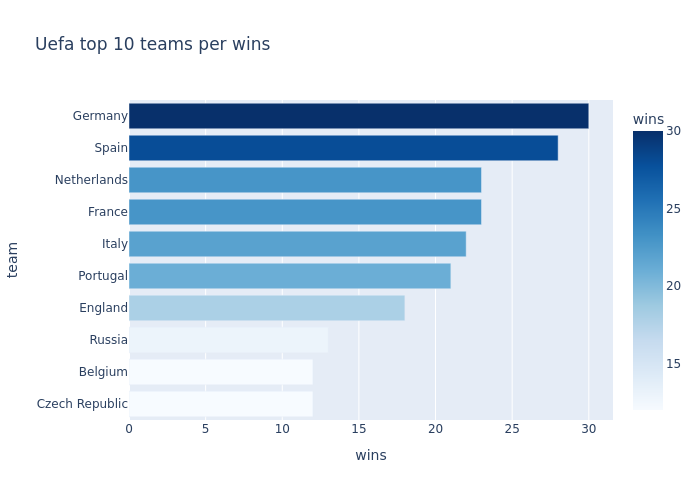

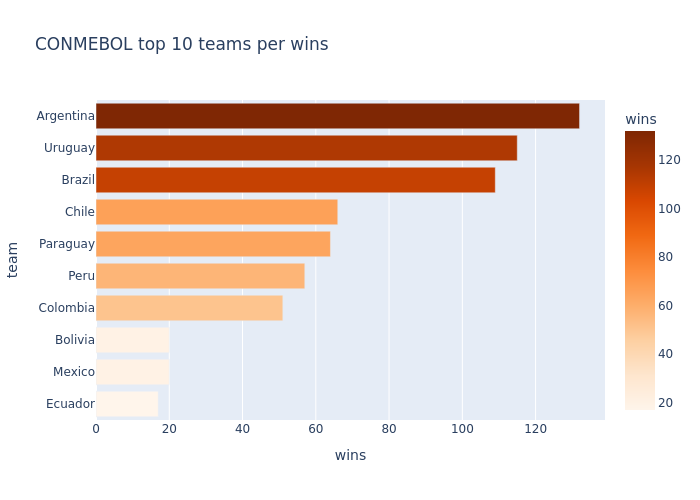

In [21]:
ranking_copa = count_wins(copa_américa_df)
ranking_euro = count_wins(uefa_euro_df)

fig_uefa = px.bar(ranking_euro.head(10).reset_index(),
                  x = 'victories', y ='index', orientation='h',
                   title= 'Uefa top 10 teams per wins',
                labels={'index' : 'team', 'victories': 'wins'},
                 color='victories', color_continuous_scale= 'Blues' )

fig_uefa.update_layout(yaxis = dict(autorange = "reversed"))
fig_uefa.show()

fig_conmebol = px.bar(ranking_copa.head(10).reset_index(),
                      x = 'victories', y = 'index', orientation= 'h',
                      title= 'CONMEBOL top 10 teams per wins',
                      labels={'index' : 'team', 'victories': 'wins'},
                      color = 'victories', color_continuous_scale='Oranges')

fig_conmebol.update_layout(yaxis =dict(autorange = 'reversed'))
fig_conmebol.show()

In [22]:
# count goals

def count_goals(df):
    goals = Counter()
    for _, row in df.iterrows():
        goals[row['home_team']] += row['home_score']
        goals[row['away_team']] += row['away_score']

    
    return pd.DataFrame.from_dict(goals, orient='index', columns=['total_goals']).sort_values('total_goals', ascending=False)

euro_goals = count_goals(uefa_euro_df).head(10)
copa_goals = count_goals(copa_américa_df).head(10)

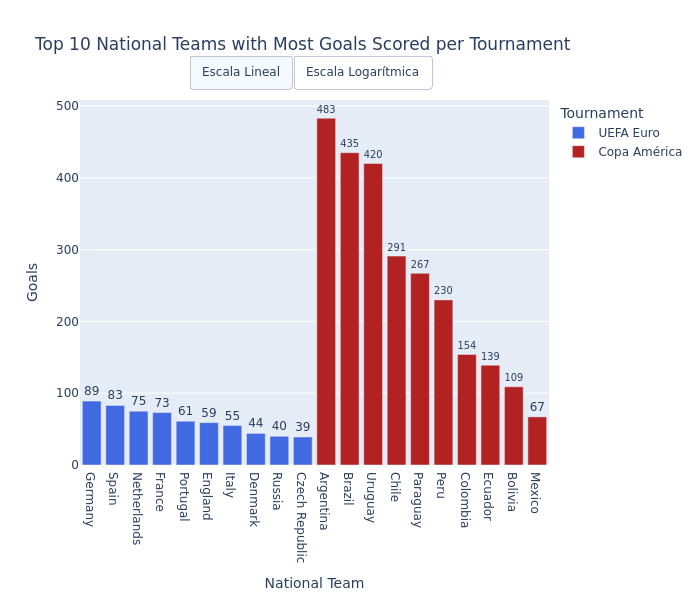

In [23]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = euro_goals.index,
    y = euro_goals['total_goals'],
    name = "UEFA Euro",
    marker_color = "royalblue",
    text = euro_goals['total_goals'],
    textposition= 'outside'
))

fig.add_trace(go.Bar(
    x = copa_goals.index,
    y = copa_goals['total_goals'],
    name = "Copa América",
    marker_color = "firebrick",
    text = copa_goals['total_goals'],
    textposition= 'outside'
))

fig.update_layout(
    title = 'Top 10 National Teams with Most Goals Scored per Tournament',
    xaxis_title = 'National Team',
    yaxis_title = 'Goals',
    barmode = 'group',
    legend_title = 'Tournament',
    height = 600,
    
    # Menú interactivo
    updatemenus=[
        {
            "buttons": [
                {
                    "label": "Escala Lineal",
                    "method": "relayout",
                    "args": [{"yaxis.type": "linear", "yaxis.title": "Goles Anotados"}]
                },
                {
                    "label": "Escala Logarítmica",
                    "method": "relayout",
                    "args": [{"yaxis.type": "log", "yaxis.title": "Goles Anotados (log)"}]
                }
            ],
            "direction": "right",
            "pad": {"r": 10, "t": 10},
            "showactive": True,
            "type": "buttons",
            "x": 0.5,
            "xanchor": "center",
            "y": 1.15,
            "yanchor": "top"
        }
    ]
)

fig.show()


**UEFA vs CONMEBOL in World Cups**

Here’s where the two regions meet directly on the global stage.

**Analysis**:

- All UEFA vs CONMEBOL matches in FIFA World Cups were extracted and classified by outcome.

- Results show:

    - **CONMEBOL** wins slightly more head-to-head encounters.

    - **Draws** are common, showing high parity.

    - **UEFA** still holds an impressive share of wins.

**Visuals**:

- Bar and Pie charts: To show win distribution and percentages.

- Top 10 teams by head-to-head victories.

- Dual histograms for goal difference distribution.

*Insight*: South Americans teams have a slight statistical edge, but many of football’s most iconic upsets and matches have come from Europeans brilliance.

In [24]:

uefa_vs_conmebol = fifa_world_cup_df.query\
    ("(home_team in @uefa_teams and away_team in @conmebol_teams) or" \
     "(home_team in @conmebol_teams and away_team in @uefa_teams)").sort_index()

In [25]:
uefa_vs_conmebol['goal_diff'] = abs(uefa_vs_conmebol['home_score'] - uefa_vs_conmebol['away_score'])


uefa_vs_conmebol['total_goals'] = abs(uefa_vs_conmebol['home_score'] + uefa_vs_conmebol['away_score'])

gpp_world_cup = uefa_vs_conmebol['total_goals'].mean().round(2)


diff_world_cup = uefa_vs_conmebol['goal_diff'].mean().round(2)


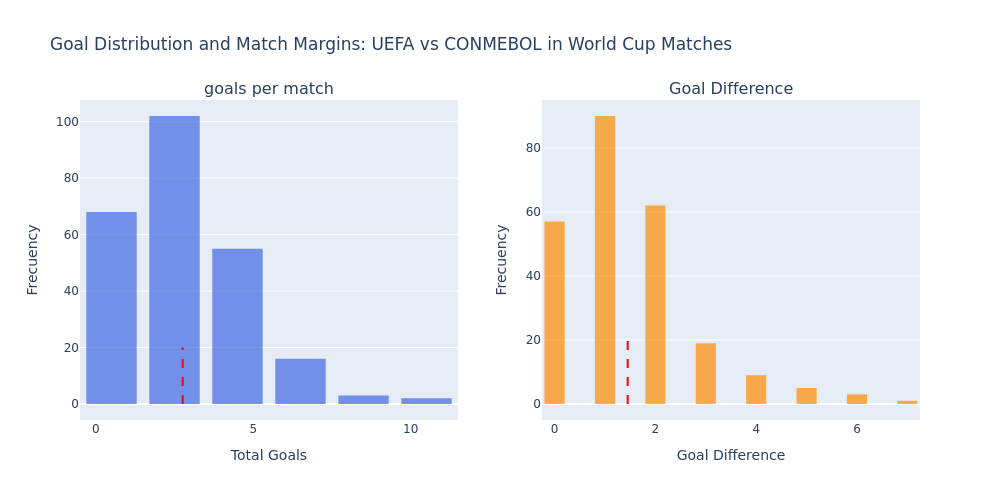

In [26]:


# Crear subplots: 1 fila, 2 columnas
fig = make_subplots(rows=1, cols=2, subplot_titles=("goals per match", "Goal Difference"))

# Histograma de total de goles
fig.add_trace(go.Histogram(
    x=uefa_vs_conmebol['total_goals'],
    nbinsx=10,
    name='Total Goals',
    marker_color='royalblue',
    opacity=0.7
), row=1, col=1)

# Línea vertical del promedio de goles por partido
fig.add_trace(go.Scatter(
    x=[gpp_world_cup]*2,
    y=[0, 20],  # Ajusta este valor según tu dataset
    mode='lines',
    name=f'Promedio: {gpp_world_cup}',
    line=dict(color='red', dash='dash')
), row=1, col=1)

# Histograma de diferencia de goles
fig.add_trace(go.Histogram(
    x=uefa_vs_conmebol['goal_diff'],
    nbinsx=15,
    name='Goal Difference',
    marker_color='darkorange',
    opacity=0.7
), row=1, col=2)

# Línea vertical del promedio de diferencia
fig.add_trace(go.Scatter(
    x=[diff_world_cup]*2,
    y=[0, 20],  # Ajusta este valor también
    mode='lines',
    name=f'Promedio: {diff_world_cup}',
    line=dict(color='red', dash='dash')
), row=1, col=2)

# Layout general
fig.update_layout(
    title_text="Goal Distribution and Match Margins: UEFA vs CONMEBOL in World Cup Matches",
    bargap=0.2,
    width=1000,
    height=500,
    showlegend=False
)

fig.update_xaxes(title_text="Total Goals", row=1, col=1)
fig.update_xaxes(title_text="Goal Difference", row=1, col=2)

fig.update_yaxes(title_text="Frecuency", row=1, col=1)
fig.update_yaxes(title_text="Frecuency", row=1, col=2)

fig.show()


In [27]:
conditions = [
    # UEFA gana (local o visitante)
    ((uefa_vs_conmebol["home_team"].isin(uefa_teams)) & (uefa_vs_conmebol["home_score"] > uefa_vs_conmebol["away_score"])) |
    ((uefa_vs_conmebol["away_team"].isin(uefa_teams)) & (uefa_vs_conmebol["away_score"] > uefa_vs_conmebol["home_score"])),
    
    # CONMEBOL gana (local o visitante)
    ((uefa_vs_conmebol["home_team"].isin(conmebol_teams)) & (uefa_vs_conmebol["home_score"] > uefa_vs_conmebol["away_score"])) |
    ((uefa_vs_conmebol["away_team"].isin(conmebol_teams)) & (uefa_vs_conmebol["away_score"] > uefa_vs_conmebol["home_score"]))
]

choises = ["UEFA", "CONMEBOL"]

uefa_vs_conmebol['conf_winner'] = np.select(conditions, choises, default= "Draw")

In [28]:
uefa_vs_conmebol

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_diff,total_goals,conf_winner
1488,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1,3,UEFA
1489,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,2,4,UEFA
1490,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1,1,CONMEBOL
1492,1930-07-17,Bolivia,Yugoslavia,0,4,FIFA World Cup,Montevideo,Uruguay,True,4,4,UEFA
1497,1930-07-19,Chile,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1,1,CONMEBOL
...,...,...,...,...,...,...,...,...,...,...,...,...
45710,2022-11-30,Poland,Argentina,0,2,FIFA World Cup,Doha,Qatar,True,2,2,CONMEBOL
45730,2022-12-09,Croatia,Brazil,1,1,FIFA World Cup,Al Rayyan,Qatar,True,0,2,Draw
45731,2022-12-09,Netherlands,Argentina,2,2,FIFA World Cup,Lusail,Qatar,True,0,4,Draw
45736,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,3,3,CONMEBOL


In [29]:
uefa_wins = len(uefa_vs_conmebol.query("conf_winner == 'UEFA'"))
conmebol_wins = len(uefa_vs_conmebol.query("conf_winner == 'CONMEBOL'"))
draw_UvsC = len(uefa_vs_conmebol.query("conf_winner == 'Draw'"))

uefa_wins_percent = (uefa_wins / len(uefa_vs_conmebol))*100
conmebol_wins_percent = (conmebol_wins / len(uefa_vs_conmebol))*100
draw_UvsC_percent = (draw_UvsC / len(uefa_vs_conmebol))*100

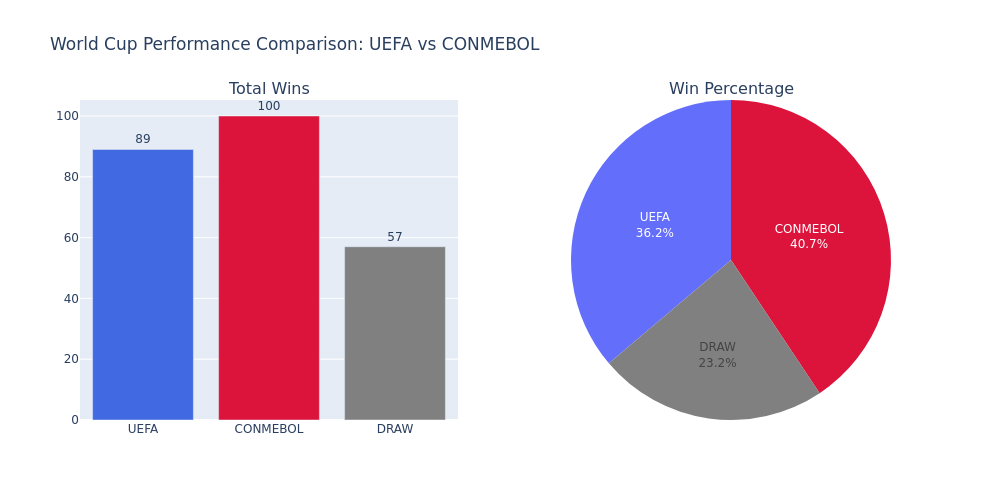

In [30]:
labels = ["UEFA", "CONMEBOL", "DRAW"]
counts = [uefa_wins, conmebol_wins, draw_UvsC]
percents = [uefa_wins_percent, conmebol_wins_percent, draw_UvsC_percent]

fig = make_subplots(rows= 1, cols= 2,
                    subplot_titles=('Total Wins', 'Win Percentage'),
                    specs=[[{"type":"bar"}, {"type":"pie"}]])

fig.add_trace(go.Bar(
    x=labels,
    y= counts,
    text = [f"{val}" for val in counts],
    textposition='outside',
    marker_color = ['royalblue', 'crimson', 'gray'],
    name = "Total"
), row= 1, col=1)

fig.add_trace(go.Pie(
    labels= labels,
    values = percents, 
    textinfo='label+percent',
    marker_colors = ['royal_blue', 'crimson', 'gray'],
    name = "Percent"
), row= 1, col=2)


fig.update_layout(
    title_text = "World Cup Performance Comparison: UEFA vs CONMEBOL",
    height = 500,
    width = 1000,
    showlegend = False
)

fig.show()


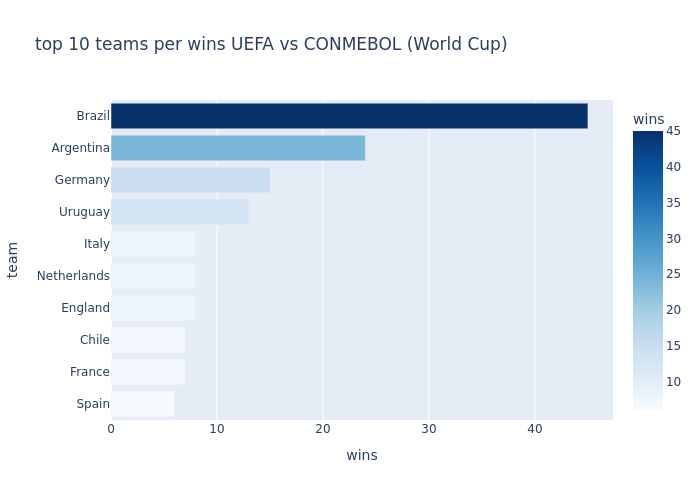

In [31]:
UvsC_ranking = count_wins(uefa_vs_conmebol)

fig = px.bar(UvsC_ranking.head(10).reset_index(),
                  x = 'victories', y ='index', orientation='h',
                   title= 'top 10 teams per wins UEFA vs CONMEBOL (World Cup)',
                labels={'index' : 'team', 'victories': 'wins'},
                 color='victories', color_continuous_scale= 'Blues' )

fig.update_layout(yaxis = dict(autorange = "reversed"))
fig.show()


**Global Goal Map**

A choropleth map visualizes the total goals scored by each country in UEFA vs CONMEBOL World Cup matches.

- Highest contributors: **Germany, Brazil, Argentina, France, Uruguay.**

- Offers a global view of scoring dominance.

*Insight*: The map reinforces the idea that top-tier football excellence is concentrated within a few legendary nations from both confederations.

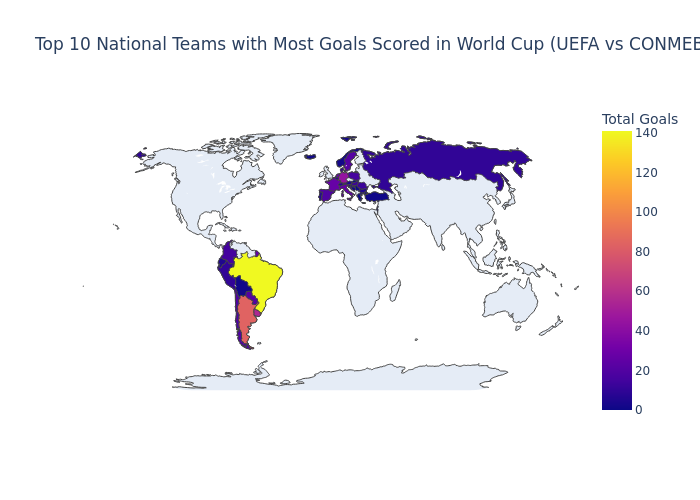

In [32]:
goals = count_goals(uefa_vs_conmebol).reset_index()
goals.rename(columns={'index':'country'}, inplace= True)

fig = px.choropleth(goals,
                    locations= "country",
                    locationmode="country names",
                    color="total_goals",
                    hover_name= "country",
                    color_continuous_scale= px.colors.sequential.Plasma,
                    title="Top 10 National Teams with Most Goals Scored in World Cup (UEFA vs CONMEBOL)"
                    )

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    coloraxis_colorbar=dict(
        title="Total Goals",
        ticksuffix='',
        showticksuffix='last'
    )
)

fig.show()



 **Conclusions**
 **Offensive Dominance**:

- **CONMEBOL** teams have scored more overall, but **UEFA** is close due to the numbers of teams

 **Competitive Balance**:

- Matches between the two confederations are generally close.

- The number of draws and narrow wins confirms a strong **competitive parity**.

 **Home Advantage**:

- **CONMEBOL** shows stronger home advantage in qualifiers, likely due to geographic and climatic factors.

- **UEFA** also benefits from home field, but differences are less extreme.

 **Final Thoughts**:

- UEFA and CONMEBOL continue to define the highest levels of international football.

- This rivalry is not just about trophies—it represents **two distinct styles**, histories, and football cultures.

- Future analysis could explore:

    - trends post-2010 or since VAR’s introduction.

    - Tactical patterns using pass maps and xG.
